Clustering cities based on the products that have sales posts in them

/content/drive/My Drive/Colab Notebooks


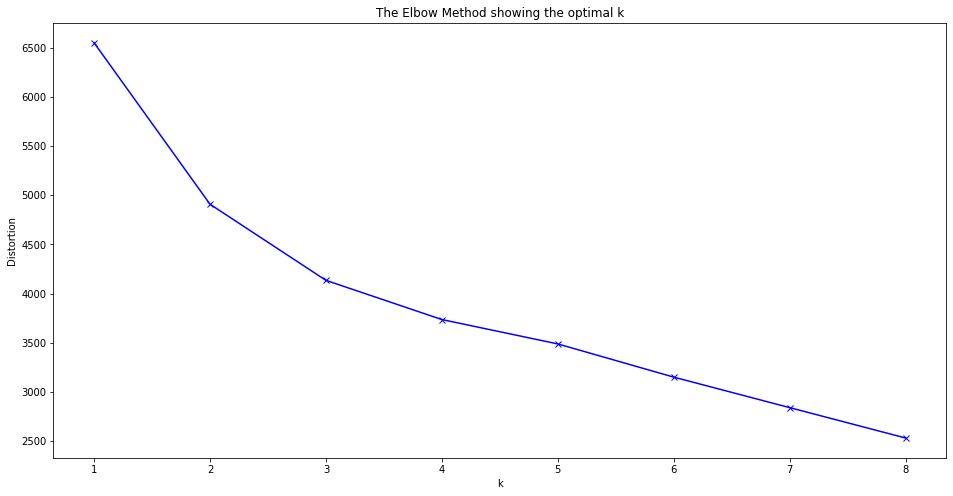

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
%cd /content/drive/My Drive/Colab Notebooks/
df = pd.read_csv(r'divar_posts_dataset.csv')
df=df[df.price!=-1]
feature_columns = ['price','cat2']
df=df[feature_columns]
cut1 = pd.notnull(df["cat2"])
dff1=df[cut1]
df31=dff1["cat2"].unique().tolist()
df1 = df31
# df1=df["cat2"].unique().tolist()
cut = pd.notnull(df["price"])
dff=df[cut]
df3=dff["price"].unique().tolist()
dfcat = df3
df=df.to_dict("records")
x=np.zeros((len(df1),len(dfcat)))
for a in df:
  for i in range(len(df1)):
    if a['cat2']==df1[i]:
      for j in range(len(dfcat)):
        if a['price']==dfcat[j]:
          x[i][j]=1
distortions = []
K = range(1,9)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

KMeans

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, max_iter = 300, random_state = 0)
kmeans.fit(x)
centers = kmeans.cluster_centers_
from matplotlib import pyplot
yhat= kmeans.predict(x)
clusters=unique(yhat)
for i in clusters:
  print("Cluster",i,"countains:")
  for j in range(len(yhat)):
    if yhat[j]==i :
      print("product",df1[j]) 

Cluster 0 countains:
product baby-and-toys
product clothing-and-shoes
product animals
product batch
product health-beauty
Cluster 1 countains:
product cars
Cluster 2 countains:
product furniture-and-home-decore
product utensils-and-appliances
product mobile-tablet
product equipments-and-machinery
Cluster 3 countains:
product childrens-clothing-and-shoe
product musical-instruments
product book-student-literature
product hobby-collectibles
product utility
product leisure-hobbies-toys
product travel-packages
product phone
Cluster 4 countains:
product parts-accessories
product game-consoles-and-video-games
product audio-video
product building-and-garden
product jewelry-and-watches
product bicycle
product computers
product sport-leisure
Cluster 5 countains:
product motorcycles


Agglomerative

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model= AgglomerativeClustering(n_clusters=6)
yhat=model.fit_predict(x)
clusters=unique(yhat)
for i in clusters:
  print("Cluster",i,"countains:")
  for j in range(len(yhat)):
    if yhat[j]==i :
      print("city",df1[j]) 

Cluster 0 countains:
city furniture-and-home-decore
city utensils-and-appliances
city audio-video
city computers
Cluster 1 countains:
city equipments-and-machinery
city motorcycles
Cluster 2 countains:
city childrens-clothing-and-shoe
city building-and-garden
city jewelry-and-watches
city bicycle
city musical-instruments
city sport-leisure
city book-student-literature
city hobby-collectibles
city leisure-hobbies-toys
city travel-packages
city phone
Cluster 3 countains:
city cars
Cluster 4 countains:
city baby-and-toys
city parts-accessories
city clothing-and-shoes
city game-consoles-and-video-games
city animals
city batch
city health-beauty
city utility
Cluster 5 countains:
city mobile-tablet


DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
model= DBSCAN(eps=0.35, min_samples=9)
yhat=model.fit_predict(x)
clusters=unique(yhat)
for i in clusters:
  print("Cluster",i,"countains:")
  for j in range(len(yhat)):
    if yhat[j]==i :
      print("city",df1[j]) 

Cluster -1 countains:
city furniture-and-home-decore
city baby-and-toys
city parts-accessories
city utensils-and-appliances
city clothing-and-shoes
city mobile-tablet
city childrens-clothing-and-shoe
city game-consoles-and-video-games
city audio-video
city cars
city building-and-garden
city jewelry-and-watches
city equipments-and-machinery
city bicycle
city animals
city batch
city musical-instruments
city health-beauty
city motorcycles
city computers
city sport-leisure
city book-student-literature
city hobby-collectibles
city utility
city leisure-hobbies-toys
city travel-packages
city phone


MeanShift

In [ ]:
from sklearn.cluster import MeanShift
model= MeanShift()
yhat= model.fit_predict(x)
clusters=unique(yhat)
for i in clusters:
  print("Cluster",i,"countains:")
  for j in range(len(yhat)):
    if yhat[j]==i :
      print("city",df1[j])

Cluster 0 countains:
city baby-and-toys
city parts-accessories
city utensils-and-appliances
city clothing-and-shoes
city childrens-clothing-and-shoe
city game-consoles-and-video-games
city audio-video
city building-and-garden
city jewelry-and-watches
city bicycle
city animals
city batch
city musical-instruments
city health-beauty
city computers
city sport-leisure
city book-student-literature
city hobby-collectibles
city utility
city leisure-hobbies-toys
city travel-packages
city phone
Cluster 1 countains:
city equipments-and-machinery
Cluster 2 countains:
city cars
Cluster 3 countains:
city furniture-and-home-decore
Cluster 4 countains:
city motorcycles
Cluster 5 countains:
city mobile-tablet


Gaussian

In [ ]:
from sklearn.mixture import GaussianMixture
model= GaussianMixture(n_components=6)
model.fit(x)
yhat= model.predict(x)
clusters=unique(yhat)
for i in clusters:
  print("Cluster",i,"countains:")
  for j in range(len(yhat)):
    if yhat[j]==i :
      print("city",df1[j])

Cluster 0 countains:
city parts-accessories
city utensils-and-appliances
city mobile-tablet
city game-consoles-and-video-games
city audio-video
city equipments-and-machinery
city computers
Cluster 1 countains:
city baby-and-toys
city clothing-and-shoes
city childrens-clothing-and-shoe
city animals
city batch
city health-beauty
city book-student-literature
city hobby-collectibles
city utility
city leisure-hobbies-toys
city phone
Cluster 2 countains:
city motorcycles
Cluster 3 countains:
city cars
Cluster 4 countains:
city furniture-and-home-decore
Cluster 5 countains:
city building-and-garden
city jewelry-and-watches
city bicycle
city musical-instruments
city sport-leisure
city travel-packages
